# **Import Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# **Functions**

In [14]:
Ind_player_info = {
    "Position":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "Player Name":["Rohit Sharma (c)",
                    "Virat Kohli",
                    "Rishabh Pant (wk)",
                    "Suryakumar Yadav",
                    "Shivam Dube",
                    "Hardik Pandya",
                    "Ravindra Jadeja",
                    "Axar Patel",
                    "Jasprit Bumrah",
                    "Arshdeep Singh",
                    "Mohammed Siraj"],
    "Is_Captain":[True,False,False,False,False,False,False,False,False,False,False],
    "Is_WicketKeeper":[False,False,True,False,False,False,False,False,False,False,False],
    "Batsman":[True,True,True,True,True,True,True,True,False,False,False],
    "Bowler":[False,False,False,False,True,True,True,True,True,True,True],
    "All-Rounder":[False,False,False,False,True,True,True,True,False,False,False],
    "Batting-Power":[80,80,80,80,75,70,65,60,40,40,40],
    "Bowling-Power":[35,40,35,35,65,70,75,70,75,75,75],
    "Batting-Style":["Right-Hand","Right-Hand","Left-Hand","Right-Hand","Left-Hand","Right-Hand","Left-Hand","Left-Hand","Right-Hand","Left-Hand","Right-Hand"]
}

ind_player_info_table = pd.DataFrame(Ind_player_info)
ind_player_info_table

# Aus_player_info = {
#     "Position":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#     "Player Name":["David Warner",
#                     "Aaron Finch (C)",
#                     "Mitchell Marsh", 
#                     "Steven Smith", 
#                     "Glenn Maxwell",
#                     "Marcus Stoinis",
#                     "Matthew Wade (wk)",
#                     "Pat Cummins",
#                     "Mitchell Starc",
#                     "Adam Zampa",
#                     "Josh Hazlewood"],
#     "Is_Captain":[],
#     "Is_WicketKeeper":[],
#     "Batsman":[],
#     "Bowler":[],
#     "All-Rounder":[],
#     "Batting-Power":[],
#     "Bowling-Power":[],
# }

,Position,Player Name,Is_Captain,Is_WicketKeeper,Batsman,Bowler,All-Rounder,Batting-Power,Bowling-Power,Batting-Style
0,1,Rohit Sharma (c),True,False,True,False,False,80,35,Right-Hand
1,2,Virat Kohli,False,False,True,False,False,80,40,Right-Hand
2,3,Rishabh Pant (wk),False,True,True,False,False,80,35,Left-Hand
3,4,Suryakumar Yadav,False,False,True,False,False,80,35,Right-Hand
4,5,Shivam Dube,False,False,True,True,True,75,65,Left-Hand
5,6,Hardik Pandya,False,False,True,True,True,70,70,Right-Hand
6,7,Ravindra Jadeja,False,False,True,True,True,65,75,Left-Hand
7,8,Axar Patel,False,False,True,True,True,60,70,Left-Hand
8,9,Jasprit Bumrah,False,False,False,True,False,40,75,Right-Hand
9,10,Arshdeep Singh,False,False,False,True,False,40,75,Left-Hand


In [15]:
def ProbSys(player):
    player_bat_power = (ind_player_info_table['Batting-Power'][ind_player_info_table['Player Name']==player].values[0])/100
    bat_probs = [
        (1 - player_bat_power) * 0.75,   # 0
        player_bat_power * 0.25,         # 1
        player_bat_power * 0.30,         # 2
        player_bat_power * 0.25,         # 4
        player_bat_power * 0.20,         # 6
        (1 - player_bat_power) * 0.25    # Out
    ]
    # Normalize probabilities to sum up to 1
    total = sum(bat_probs)
    bat_probs = [p / total for p in bat_probs]
    return bat_probs

def player_score_card(player,match_scorecard_Batting):
    print(f"\n---------------------------------")
    print(f'''{player}\t: {match_scorecard_Batting["Runs"][list(match_scorecard_Batting["Batsman"]).index(player)]} Runs ({match_scorecard_Batting["Balls"][list(match_scorecard_Batting["Batsman"]).index(player)]} Balls)''')
    print(f"---------------------------------\n")


def MatchPlay(Team_Table):
    print("---------Match Begins------------")
    print()
    all_batsmen = Team_Table['Player Name']
    
    wickets_fall = 0
    
    pair = {
        "P1":all_batsmen[0],
        "P2":all_batsmen[1]
    }
    
    match_scorecard_Batting = {
        "Batsman":all_batsmen,
        "Runs": [0,0,0,0,0,0,0,0,0,0,0],
        "Balls":[0,0,0,0,0,0,0,0,0,0,0],
        "Strike-Rate":[0,0,0,0,0,0,0,0,0,0,0],
        "Fours":[0,0,0,0,0,0,0,0,0,0,0],
        "Six":[0,0,0,0,0,0,0,0,0,0,0]
    }
    
    strike = {
        "Striker":"P1"
    }
    
    opts = [0,1,2,4,6,"Out"]
     
    per_over_runs = {}
    per_over_wkts = {}
    overs = 20
    
    while (wickets_fall < 10):
        for over in range(overs):
            over_run = 0
            over_wkt = 0
            for j in range(6):
                probs = ProbSys(pair[strike["Striker"]])
                ball = random.choices(opts,probs)[0]
                print(f"{j+1}:",pair[strike["Striker"]],":",ball)
                
                # Striker Index in match_scorecard_Batting's Batting List
                str_idx = list(match_scorecard_Batting["Batsman"]).index(pair[strike["Striker"]])
                match_scorecard_Batting["Balls"][str_idx] += 1
                if ball != "Out":                
                    match_scorecard_Batting["Runs"][str_idx] += ball
                    over_run += ball
                    Str_rate = round((match_scorecard_Batting["Runs"][str_idx] / match_scorecard_Batting["Balls"][str_idx])*100,0)
                    match_scorecard_Batting["Strike-Rate"][str_idx] = Str_rate
                    if ball == 4:
                        match_scorecard_Batting["Fours"][str_idx] += 1
                    elif ball == 6:
                        match_scorecard_Batting["Six"][str_idx] += 1
                    
    
                # Changing the Strike
    
                if ball == 1:
                    if strike["Striker"]=="P1":
                        strike["Striker"]="P2"
                    else:
                        strike["Striker"]="P1"
                elif ball == "Out":
                    player_score_card(pair[strike["Striker"]],match_scorecard_Batting)
                    
                    wickets_fall+=1
                    over_wkt += 1
                    Str_rate = round((match_scorecard_Batting["Runs"][str_idx] / match_scorecard_Batting["Balls"][str_idx])*100,0)
                    match_scorecard_Batting["Strike-Rate"][str_idx] = Str_rate
                    if wickets_fall == 10:
                        break
                    else:
                        pair[strike["Striker"]] = all_batsmen[wickets_fall+1]
                    
                # time.sleep(0.5)
    
                    
            if wickets_fall == 10:
                per_over_runs[over+1] = over_run
                per_over_wkts[over+1] = over_wkt
                break
            print(f"\n--------- END OF OVER {over+1} ---------")
            print(f'''IND\t\t\t: {sum(list(match_scorecard_Batting["Runs"]))}/{wickets_fall}''')
            print(f'''Run-Rate\t\t: {round(sum(list(match_scorecard_Batting["Runs"]))/(over+1),2)}''')
            print(f'''{pair["P1"]}\t: {match_scorecard_Batting["Runs"][list(match_scorecard_Batting["Batsman"]).index(pair["P1"])]} Runs ({match_scorecard_Batting["Balls"][list(match_scorecard_Batting["Batsman"]).index(pair["P1"])]} Balls)''')
            print(f'''{pair["P2"]}\t: {match_scorecard_Batting["Runs"][list(match_scorecard_Batting["Batsman"]).index(pair["P2"])]} Runs({match_scorecard_Batting["Balls"][list(match_scorecard_Batting["Batsman"]).index(pair["P2"])]} Balls)''')
            print(f"---------------------------------\n")
    
            per_over_runs[over+1] = over_run
            per_over_wkts[over+1] = over_wkt
            
            # time.sleep(1)
            
            if strike["Striker"]=="P1":
                strike["Striker"]="P2"
            else:
                strike["Striker"]="P1"
        break
    
    
    
    sc = pd.DataFrame(match_scorecard_Batting)
    
    if wickets_fall != 10:
        sc["Batsman"] = sc["Batsman"].str.replace(pair["P1"],f'''{pair["P1"]} *''')
        sc["Batsman"] = sc["Batsman"].str.replace(pair["P2"],f'''{pair["P2"]} *''')
        
    print("\n",sc)
    return sc, per_over_wkts, per_over_runs

In [16]:
sc, per_over_wkts, per_over_runs = MatchPlay(ind_player_info_table)

---------Match Begins------------

1: Rohit Sharma (c) : 2
2: Rohit Sharma (c) : 1
3: Virat Kohli : 6
4: Virat Kohli : 2
5: Virat Kohli : 2
6: Virat Kohli : 4

--------- END OF OVER 1 ---------
IND			: 17/0
Run-Rate		: 17.0
Rohit Sharma (c)	: 3 Runs (2 Balls)
Virat Kohli	: 14 Runs(4 Balls)
---------------------------------

1: Rohit Sharma (c) : Out

---------------------------------
Rohit Sharma (c)	: 3 Runs (3 Balls)
---------------------------------

2: Rishabh Pant (wk) : 1
3: Virat Kohli : 0
4: Virat Kohli : 4
5: Virat Kohli : 1
6: Rishabh Pant (wk) : 2

--------- END OF OVER 2 ---------
IND			: 25/1
Run-Rate		: 12.5
Rishabh Pant (wk)	: 3 Runs (2 Balls)
Virat Kohli	: 19 Runs(7 Balls)
---------------------------------

1: Virat Kohli : 0
2: Virat Kohli : 2
3: Virat Kohli : 4
4: Virat Kohli : Out

---------------------------------
Virat Kohli	: 25 Runs (11 Balls)
---------------------------------

5: Suryakumar Yadav : 6
6: Suryakumar Yadav : 2

--------- END OF OVER 3 ---------
IND

# **Charts & Graphics**

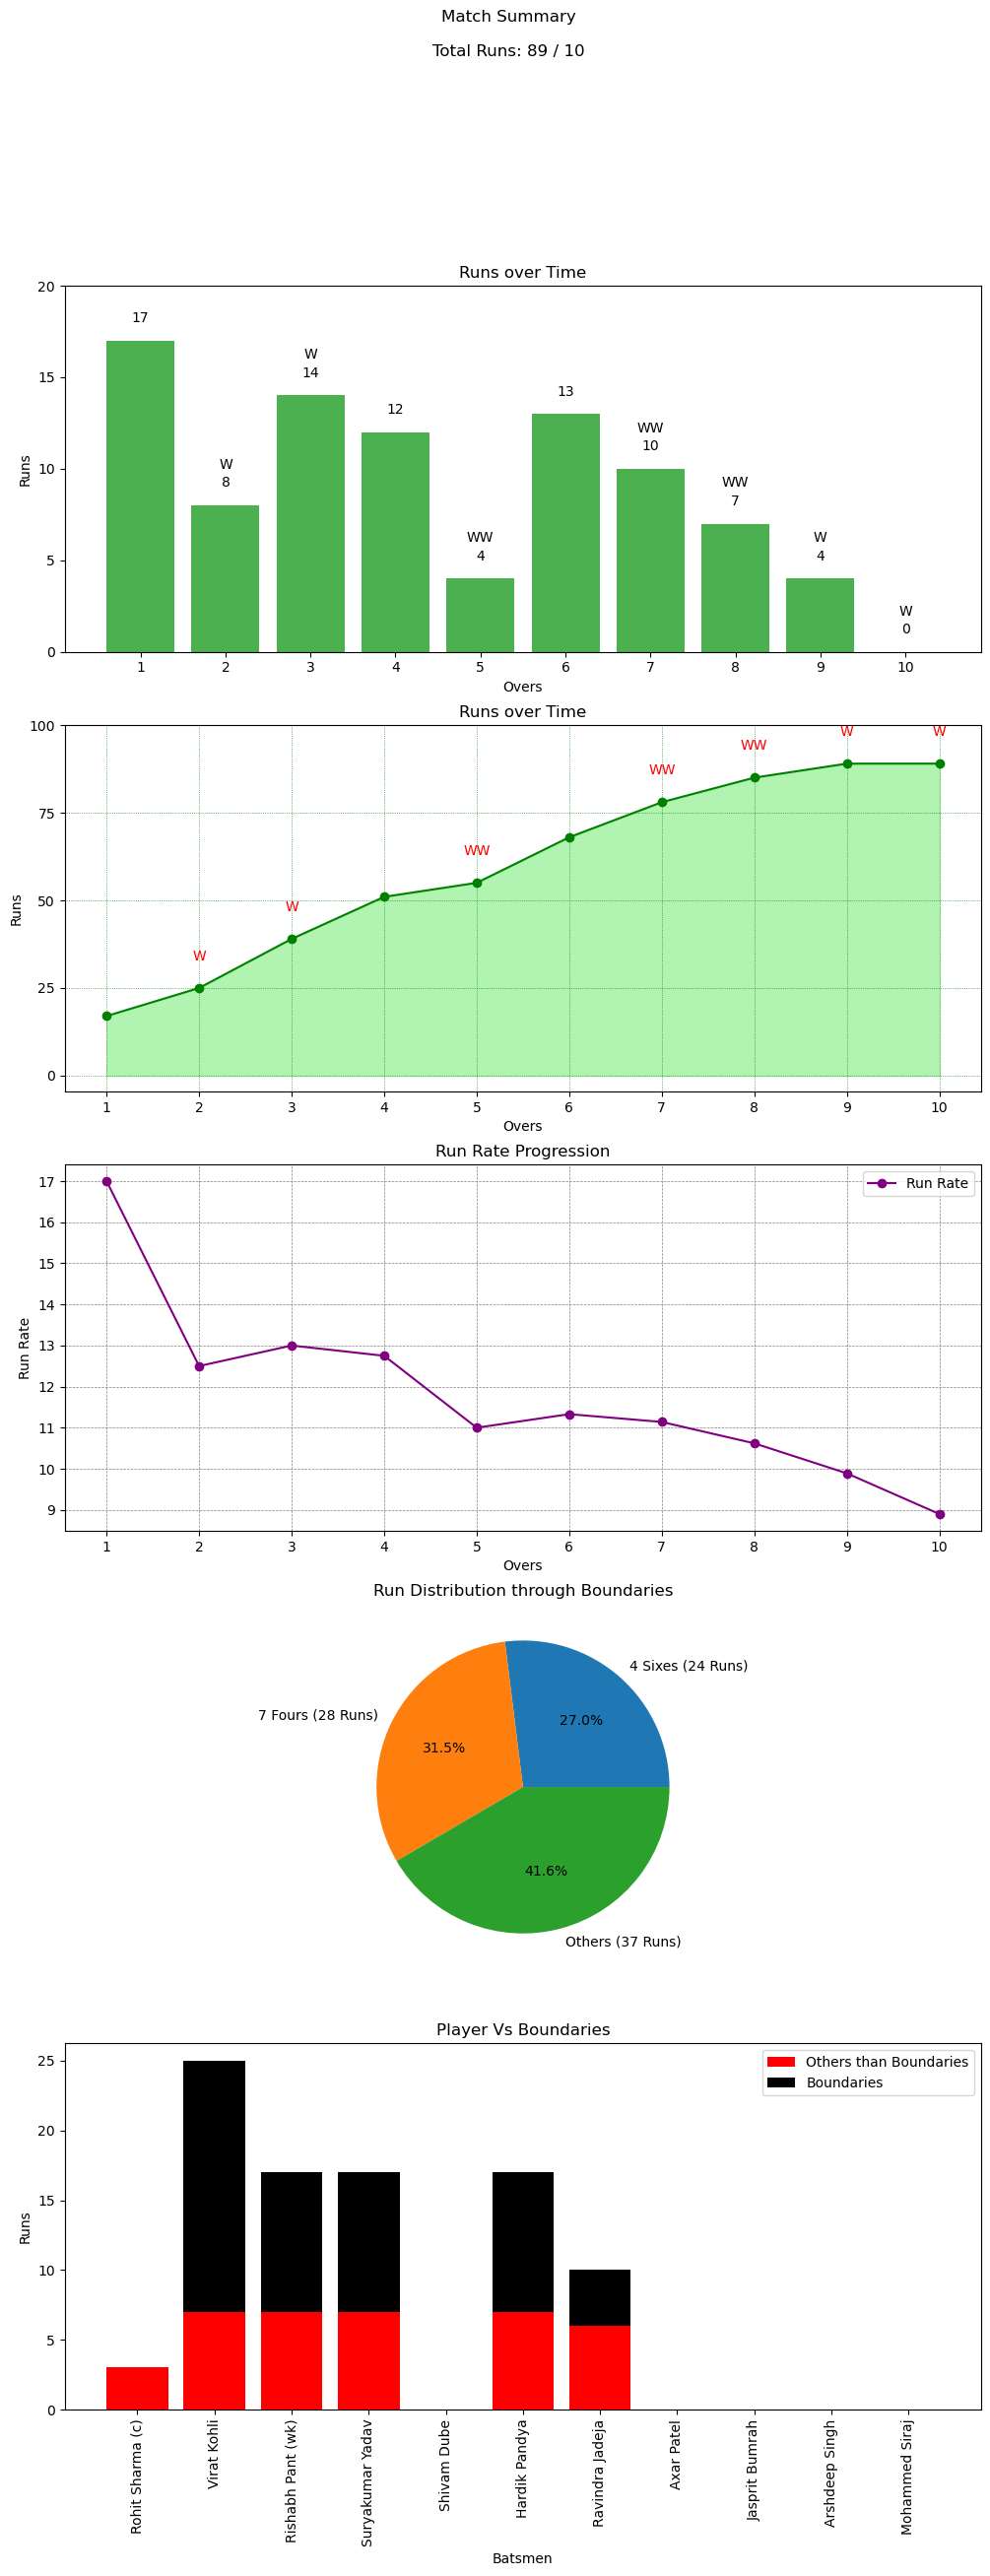

In [17]:
def addlabels1(x,y,w_x,w_y):
    for i in range(len(x)):
        plt.text(i+1,y[i]+2,(w_y[i])*"W",ha = 'center')
        plt.text(i+1,y[i]+1,y[i],ha = 'center')

plt.figure(figsize=(12,28))
plt.suptitle(f'''Match Summary\n\nTotal Runs: {sum(sc["Runs"])} / {sum(per_over_wkts.values())}''')

# FIRST
# Runs Per Over (RPO) Bar Graph

w_x = list(per_over_wkts.keys())
w_y = list(per_over_wkts.values())
    

x = list(per_over_runs.keys())
y = list(per_over_runs.values())

plt.subplot(5,1,1)

plt.bar(x,y,color="#4CAF50")
# addlabels(x,y)
addlabels1(x,y,w_x,w_y)

plt.title("Runs over Time")
plt.xlabel("Overs")
plt.ylabel("Runs")

plt.xticks(np.arange(1, max(x)+1, step=1))
plt.yticks(np.arange(0, max(y)+6, step=5))


# SECOND

Ovs = list(per_over_runs.keys())
Runs = list(per_over_runs.values())

cum_runs = pd.Series(Runs).cumsum()


def addlabels2(x,y,w_x,w_y):
    for i in range(len(x)):
        plt.text(i+1,y[i]+8,(w_y[i])*"W", ha='center', color='red', fontsize=10)  # Wickets Data Labels
        # plt.text(i+1,y[i]+20,y[i],ha = 'center')        # Runs Data Labels

w_x = list(per_over_wkts.keys())
w_y = list(per_over_wkts.values())

x = Ovs
y = cum_runs

plt.subplot(5,1,2)
plt.plot(x,y,marker="o",color='green')
plt.fill_between(x, y, color='lightgreen', alpha=0.7)

addlabels2(x,y,w_x,w_y)

plt.title("Runs over Time")
plt.xlabel("Overs")
plt.ylabel("Runs")

plt.xticks(np.arange(1, max(x)+1, step=1))
plt.yticks(np.arange(0, max(y)+26, step=25))

plt.grid(color = "green",linestyle=':',linewidth=0.5)


# THIRD

overs = list(per_over_runs.keys())
runs = list(per_over_runs.values())

run_rate = round(pd.Series(runs).cumsum() / pd.Series(overs),2)

plt.subplot(5,1,3)

plt.plot(overs, run_rate, marker="o", color="purple", label="Run Rate")

plt.title("Run Rate Progression")
plt.xlabel("Overs")
plt.ylabel("Run Rate")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.legend()
plt.xticks(overs)


# FOURTH

plt.subplot(5,1,4)

# Pie Chart

Total_Wkts = sum(per_over_wkts.values())

Total_Runs = sum(sc["Runs"])

Total_Six = sum(sc["Six"]) * 6
Total_Fours = sum(sc["Fours"]) * 4
Total_Others = Total_Runs - Total_Six - Total_Fours

lab = [f"{Total_Six//6} Sixes ({Total_Six} Runs)",f"{Total_Fours//4} Fours ({Total_Fours} Runs)",f"Others ({Total_Others} Runs)"]
plt.pie([Total_Six,Total_Fours,Total_Others],labels=lab,autopct='%1.1f%%')
plt.title("Run Distribution through Boundaries")


# FIFTH

plt.subplot(5,1,5)

batsmen = sc["Batsman"]
boundary = (sc["Fours"] *4) + (sc["Six"] * 6)
others = sc["Runs"] - boundary

x = np.arange(len(batsmen))

# plt.bar(x, total,label="Total", color='blue')
plt.bar(x, others,label="Others than Boundaries", color='red')
plt.bar(x, boundary,bottom=others, label="Boundaries", color='black')

plt.xlabel("Batsmen")
plt.ylabel("Runs")
plt.title("Player Vs Boundaries")
plt.xticks(x, batsmen, rotation=90)
plt.legend()


plt.show()